In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import wordcloud
import nltk
import warnings

import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Chargement des données

Création d'un dataframe à partir d'un fichier csv.
Ce fichier contient un ensemble de phrases qui sont classifiées en *spam* ou en *ham*.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ANALYSE/spam.csv", encoding='latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Renommage des attributs

On effectue un renommage des attributs du dataframe pour rendre les données plus lisibles et compréhensible.

On sélectionne également 5 objets aléatoirement dans le dataframe pour avoir un premier aperçu du dataframe.

In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns = {'v1':'class_label','v2':'message'},inplace=True)
df.sample(5)

,class_label,message
1113,ham,"No I'm good for the movie, is it ok if I leave..."
5194,ham,Ok... Take ur time n enjoy ur dinner...
3291,ham,Dear good morning how you feeling dear
4398,ham,Yes just finished watching days of our lives. ...
2673,ham,"Good afternoon, my boytoy ... How are you feel..."


# Visualisation de la répartition des données

On visualise la classification des données grâce à un histogramme pour avoir un meilleur aperçu sur leurs classification.

In [6]:
fig = px.histogram(df, x="class_label", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"])
fig.show()

# Création de l'attibut "length"

Length correspond à la taille du message, on crée des données quantitative pour facilité la classification.

In [7]:
df['length'] = df['message'].apply(len)
df.head()

,class_label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
fig = px.histogram(df, x="class_label", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"])
fig.show()

# Visualisation par nuage de mots

Cette méthode de visualisation va nous permettre d'observer et de ramarquer les mots les plus importants dans le dataframe.

On va pouvoir observer les mots les plus utilisés dans les spam et les ham.

In [9]:
data_ham  = df[df['class_label'] == "ham"].copy()
data_spam = df[df['class_label'] == "spam"].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

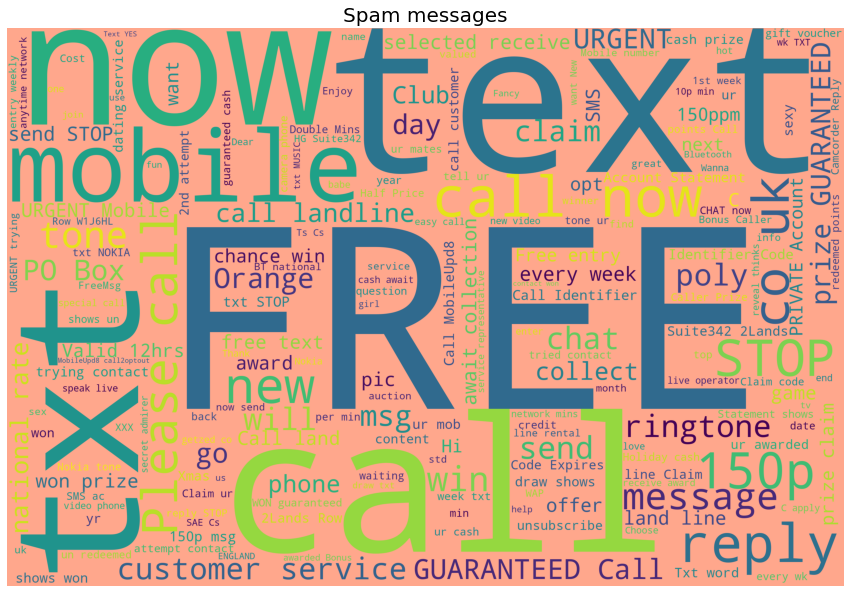

In [10]:
show_wordcloud(data_spam, "Spam messages")


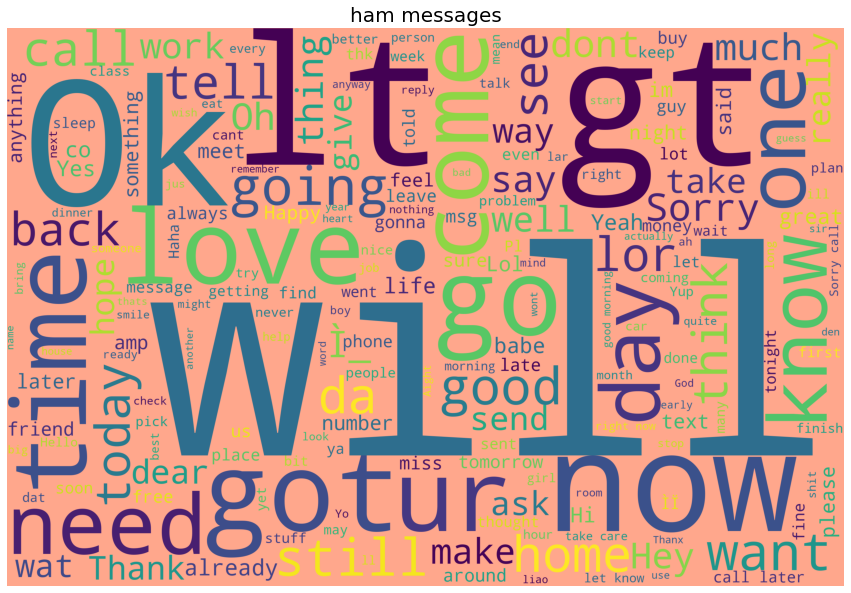

In [11]:
show_wordcloud(data_ham, "ham messages")


In [12]:
df['class_label'] = df['class_label'].map( {'spam': 1, 'ham': 0})


In [13]:
# Replace email address with 'emailaddress'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace urls with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbol with 'money-symbol'
df['message'] = df['message'].str.replace(r'£|\$', 'money-symbol')

# Replace 10 digit phone number with 'phone-number'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# Replace normal number with 'number'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
df['message'] = df['message'].str.lower()


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


In [16]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
sms_df = df['message']
from nltk.tokenize import word_tokenize

# creating a bag-of-words model
all_words = []
for sms in sms_df:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
     

all_words = nltk.FreqDist(all_words)     

In [19]:
print('Number of words: {}'.format(len(all_words)))


Number of words: 7870


# Visualisation des mots les plus utilisés

Voici un autre moyen de visualiser les mots les plus utilisés d'après le dataframe.

Le graphe apporte des précisions sur le nombre de fois que le mot est utilisé.

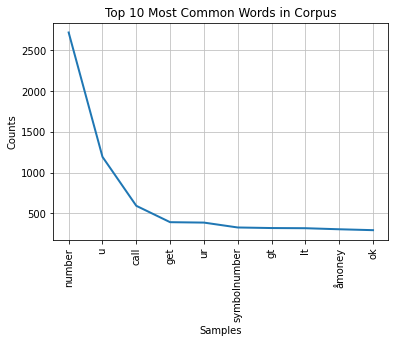

In [20]:
all_words.plot(10, title='Top 10 Most Common Words in Corpus');


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(sms_df)
import pickle
#serializing our model to a file called model.pkl
pickle.dump(tfidf_model, open("/content/drive/MyDrive/Colab Notebooks/ANALYSE/tfidf_model.pkl","wb"))
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7809,7810,7811,7812,7813,7814,7815,7816,7817,7818,7819,7820,7821,7822,7823,7824,7825,7826,7827,7828,7829,7830,7831,7832,7833,7834,7835,7836,7837,7838,7839,7840,7841,7842,7843,7844,7845,7846,7847,7848
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
### Separating Columns
df_train = tfidf_data.iloc[:4457]
df_test = tfidf_data.iloc[4457:]

target = df['class_label']
df_train['class_label'] = target

Y = df_train['class_label']
X = df_train.drop('class_label',axis=1)

# splitting training data into train and validation using sklearn
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)


# Classification

On essaye de créer un modèle à partir des données du dataframe.

In [24]:
import lightgbm as lgb
from sklearn.metrics import f1_score

def train_and_test(model, model_name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'F1 score is: {f1_score(pred, y_test)}')
    
for depth in [1,2,3,4,5,6,7,8,9,10]:
    lgbmodel = lgb.LGBMClassifier(max_depth=depth, n_estimators=200, num_leaves=40)
    print(f"Max Depth {depth}")
    print(" ")
    print(" ")
    train_and_test(lgbmodel, "Light GBM")


Max Depth 1
 
 
F1 score is: 0.8842975206611571
Max Depth 2
 
 
F1 score is: 0.9024390243902439
Max Depth 3
 
 
F1 score is: 0.928
Max Depth 4
 
 
F1 score is: 0.9328063241106719
Max Depth 5
 
 
F1 score is: 0.9498069498069499
Max Depth 6
 
 
F1 score is: 0.9416342412451363
Max Depth 7
 
 
F1 score is: 0.945736434108527
Max Depth 8
 
 
F1 score is: 0.9416342412451363
Max Depth 9
 
 
F1 score is: 0.9420849420849421
Max Depth 10
 
 
F1 score is: 0.9416342412451363


In [25]:
from sklearn.model_selection import RandomizedSearchCV
lgbmodel_bst = lgb.LGBMClassifier(max_depth=6, n_estimators=200, num_leaves=40)
param_grid = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
    "min_split_gain": [0.0, 0.1, 0.01],
    "min_child_weight": [0.001, 0.01, 0.1, 0.001],
    "min_child_samples": [20, 30, 25],
    "subsample": [1.0, 0.5, 0.8],
}
model = RandomizedSearchCV(lgbmodel_bst, param_grid, random_state=1)
search = model.fit(X_train, y_train)
search.best_params_

{'bagging_fraction': 0.6,
 'bagging_freq': 3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 30,
 'min_child_weight': 0.01,
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 88,
 'reg_alpha': 0.5722222222222222,
 'reg_lambda': 0.47777777777777775,
 'subsample': 0.5}

In [26]:
best_model = lgb.LGBMClassifier(subsample=0.5,
                            reg_lambda= 0.47777777777777775,
                            reg_alpha= 0.5722222222222222,
                            num_leaves= 88,
                            min_split_gain= 0.01,
                            min_data_in_leaf= 10,
                            min_child_weight= 0.01,
                            min_child_samples= 30,
                            max_depth= 3,
                            learning_rate= 0.1,
                            bagging_freq= 3,
                            bagging_fraction= 0.6,
                            random_state=1)
best_model.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, max_depth=3,
               min_child_samples=30, min_child_weight=0.01, min_data_in_leaf=10,
               min_split_gain=0.01, num_leaves=88, random_state=1,
               reg_alpha=0.5722222222222222, reg_lambda=0.47777777777777775,
               subsample=0.5)